In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import lsst.sims.featureScheduler as fs
from speed_observatory import Speed_observatory


In [2]:
survey_length = 2.2  # days
# Define what we want the final visit ratio map to look like
target_maps = fs.standard_goals()

filters = ['r', 'i']
weights = {}
weights['r'] = [1., 1., 1., 1]
weights['i'] = [1.5, 1., 0., 1]
surveys = []
for filtername in filters:
    bfs = []
    bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(target_map=target_maps[filtername], 
                                           filtername=filtername))
    bfs.append(fs.Filter_change_basis_function(filtername=filtername))
    bfs.append(fs.Visit_repeat_basis_function(filtername='ri'))
    weight = weights[filtername]
    surveys.append(fs.Simple_greedy_survey_fields(bfs, weight, filtername=filtername))

scheduler = fs.Core_scheduler(surveys)

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler, survey_length=survey_length)


progress = 99.0%Completed 1739 observations


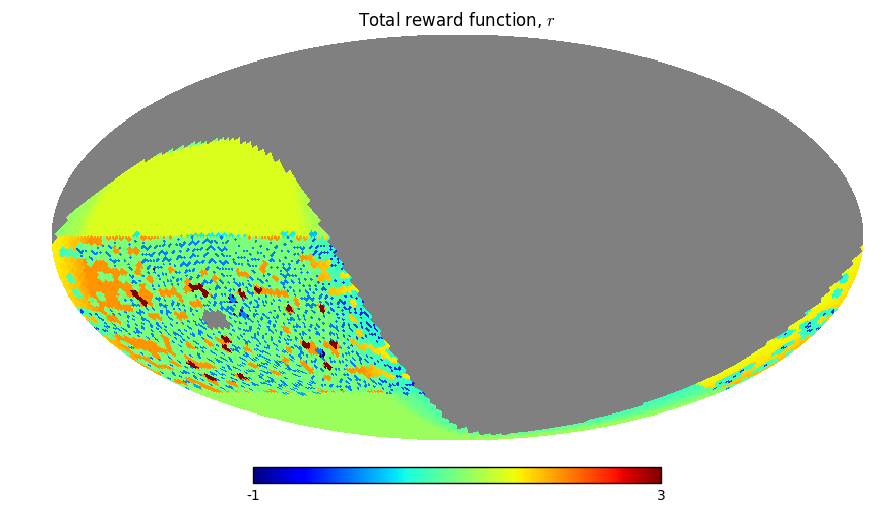

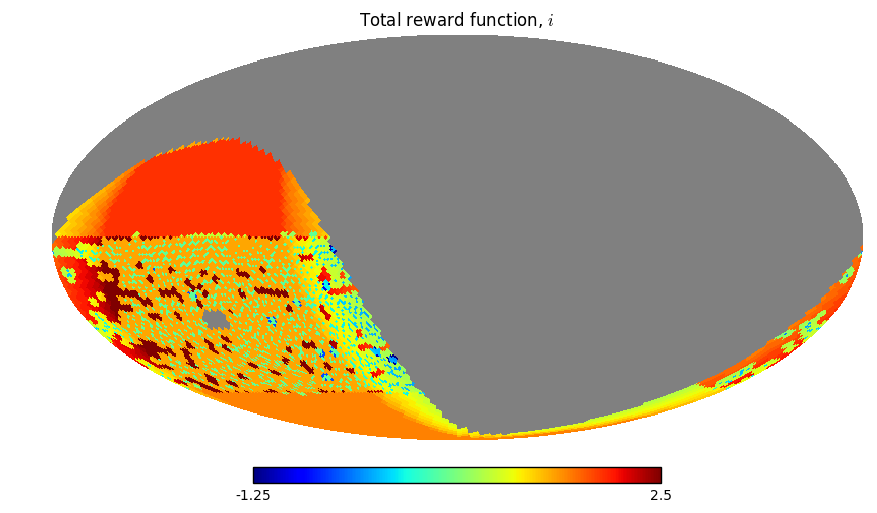

In [3]:
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.calc_reward_function(), title=r'Total reward function, $%s$' % fn)

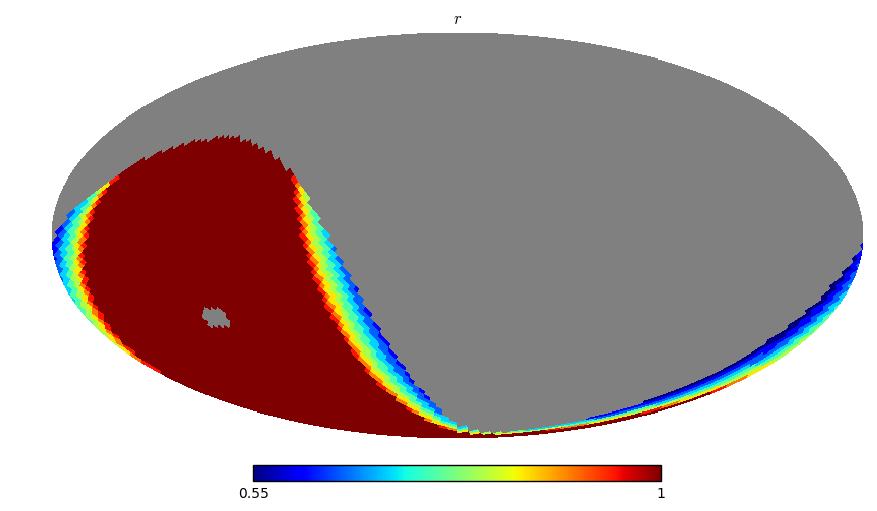

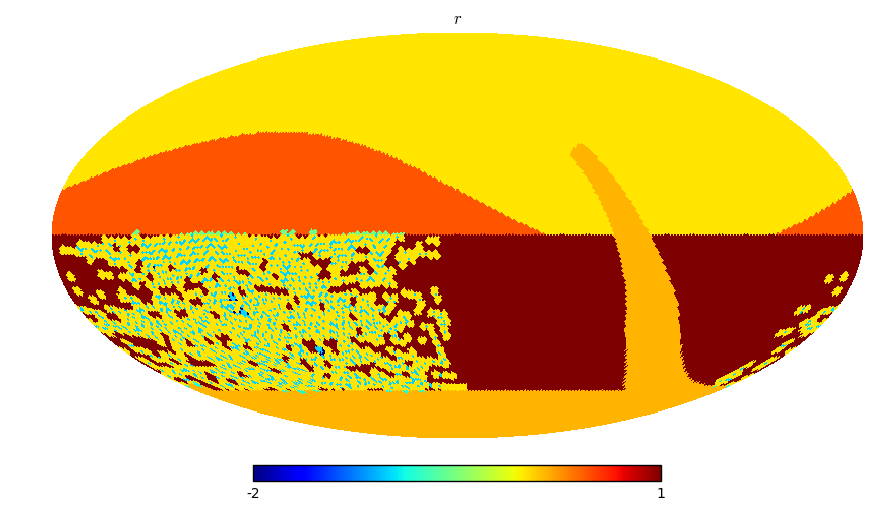

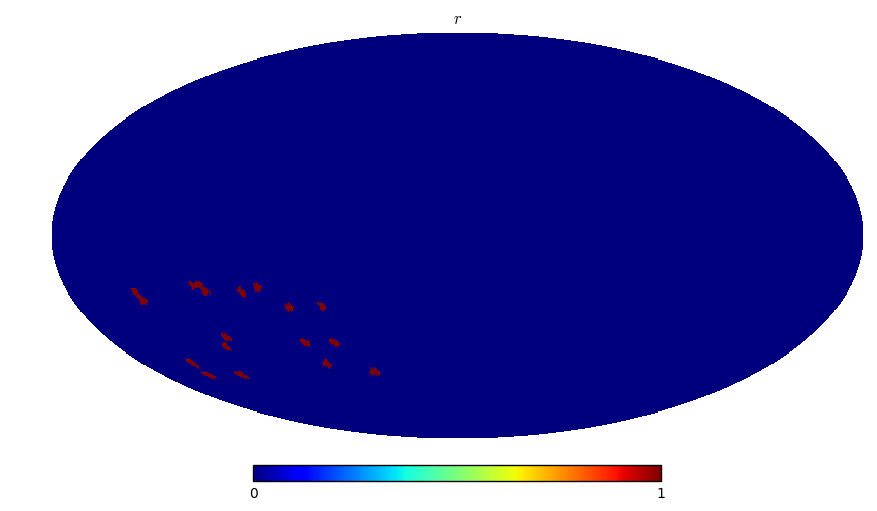

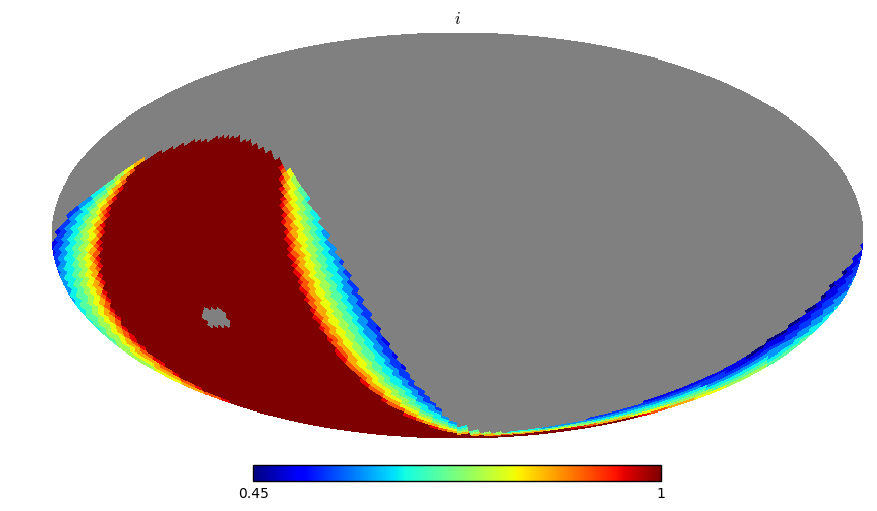

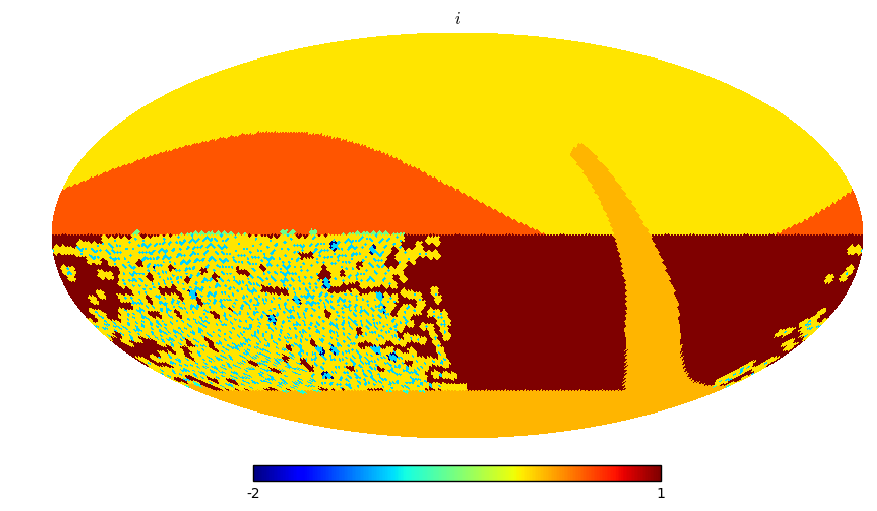

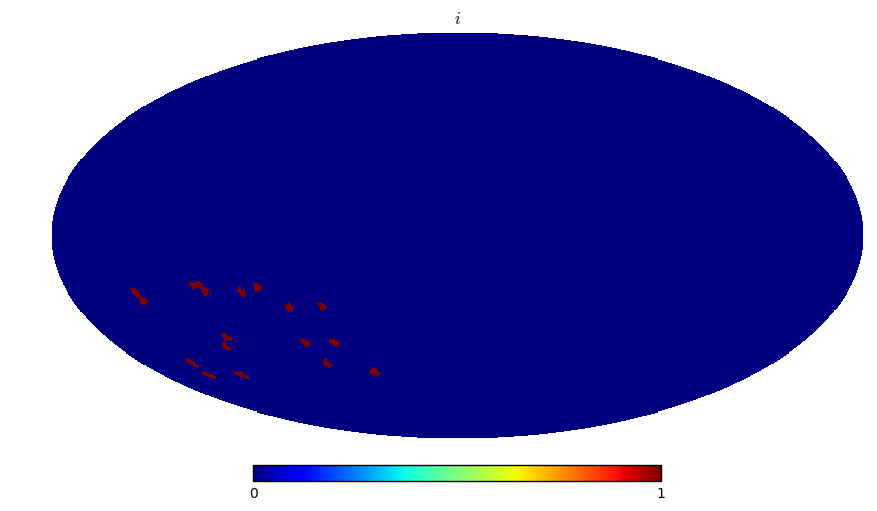

In [4]:
for fn, survey in zip(filters, scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, title='$%s$' % fn)

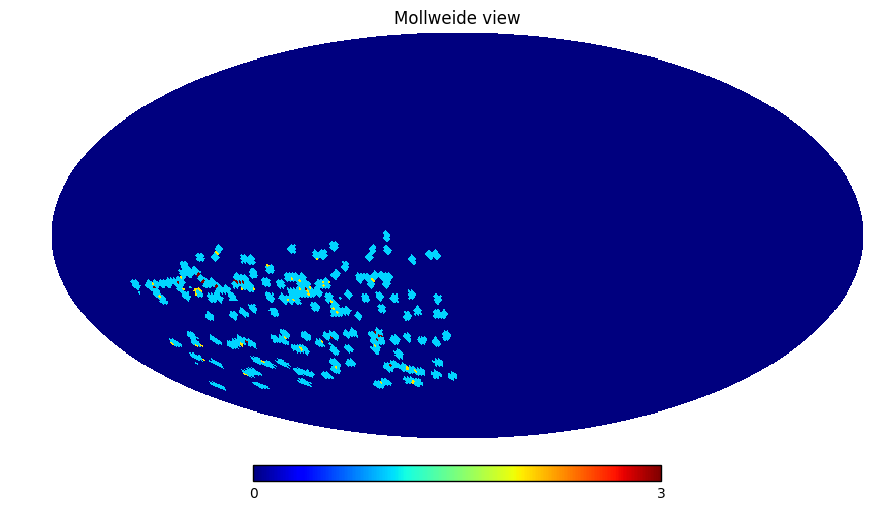

In [5]:
hp.mollview(scheduler.surveys[1].basis_functions[3].survey_features['Pair_in_night'].feature)

In [6]:
observations['night']

array([0, 0, 0, ..., 2, 2, 2])

In [7]:
observatory.mjd

array([ 59582.23530912])

In [8]:
observations['mjd']

array([ 59580.03819444,  59580.03863298,  59580.03906703, ...,
        59582.23395517,  59582.23446005,  59582.23493875])